# 12A_cooccurence matrix plots

3/16/2021
make motifx motif matrix cooccurence plots


In [20]:
import pandas as pd
import glob,os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
save_dir = '../data/processed/fig4_modelling/cooccurence_matrix_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [7]:
loop_type_files = sorted(glob.glob('../data/processed/fig4_modelling/tf_tf_pairs/*loop_type.csv'))
print(len(loop_type_files))
print(loop_type_files)

29
['../data/processed/fig4_modelling/tf_tf_pairs/expr_Airway_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Astrocytes_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Bladder_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Colon_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Esophageal_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD0_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD3_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_GDSD6_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_GM12878_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_HMEC_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Melanocytes_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Ovarian_loop_type.csv', '../data/processed/fig4_modelling/tf_tf_pairs/expr_Pancreas_loop_type.csv', '../data/processed/fig

In [25]:
# testing
df = pd.read_csv(loop_type_files[1],index_col=0).fillna('').reset_index()
df[['tf1','tf2']] = df['index'].str.split('::',expand=True)
df2 = df.copy()
df2[['tf2','tf1']] = df2['index'].str.split('::',expand=True)
df = pd.concat([df,df2])
df_wide = df.pivot(index='tf1',columns='tf2',values='pro_pro_count').fillna(0.0)
print(df_wide.shape)

(96, 96)


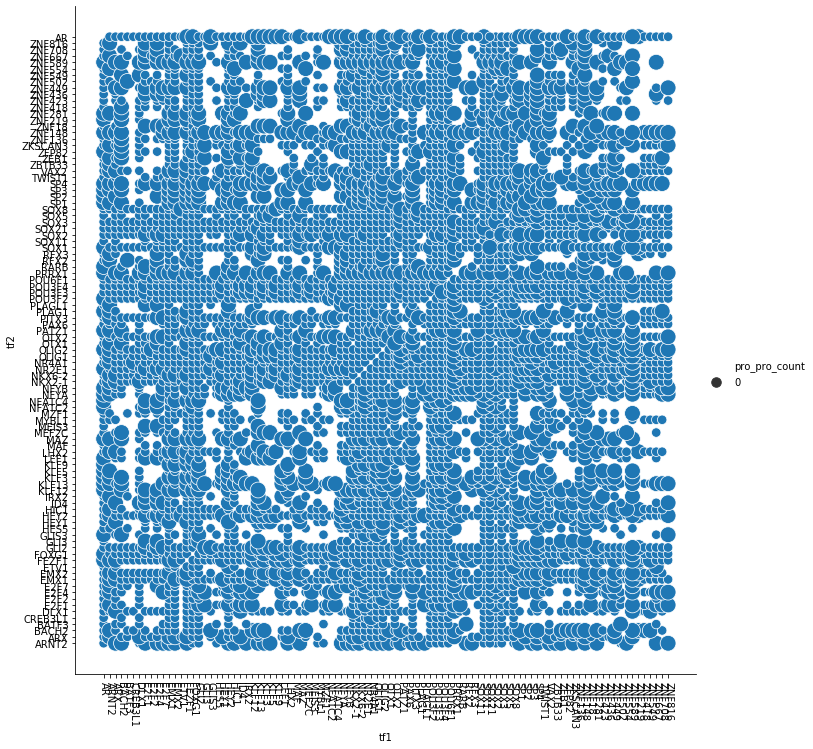

In [27]:

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=df,
    x="tf1", y="tf2",  size="pro_pro_count",#hue="correlation",
   # palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set_xticklabels(rotation=270)
